In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10, array, sqrt, log 

font = {'family' : 'Arial',
        'size'   : 18}

plt.rc('font', **font)

In [2]:
def model(z,t, params):
    kf, kr, A, n = params
    # kf: forward rate
    # kr: reverse rate 
    # A: Arp density 
    # n: number of clusters
    F, G = z
    dFdt = kf*F*G**2 *A - kr*F
    dGdt = -dFdt
    return [dFdt, dGdt]

def getActinLevel(IC = [1,10], params=(1,1,1,1)):
    kf, kr, A, n = params
    # long enough to reach steady state 
    t = np.linspace(0, 500, 1000)
    zList = [odeint(model, IC, t, args=((kf,kr,a,n),)) for a in A]
    FA = [z[-1,0] for z in zList]
    return FA



Surface area of a hemiSphere, $ S_{hemiSphere} = K(f) * S_{oblate} $, where  $S_{oblate}$ refers to the surface area of a hemiSpheroidal cluster with a hemiSphericity, hS < 1. $K(f)$ is a function of the shape parameter, $f$, such that $f = hS^{2/3}$. 

$K(f)$ is defined as, 

$$ K(f) = 0.5*(\frac{1}{f} + \frac{f^2}{2e} log(\frac{1+e}{1-e})) $$

where $$ e = \sqrt{(1-f^3)} $$

For a fixed number of Arp2/3 count, $$ S_{oblate} * \alpha_{oblate} =  S_{hemiSphere} * \alpha_{hemiSphere} $$

$$ \alpha_{oblate} = \frac{1}{K(f)} * \alpha_{hemiSphere} $$

In [3]:
def calc_oblate_factor(hS):
    f = hS**(2/3)
    e = sqrt((1 - f**3))
    p = (1+e)/(1-e)
    Kf = 0.5*(1/f + ((f**2)/(2*e)) * log(p))
    return 1/Kf

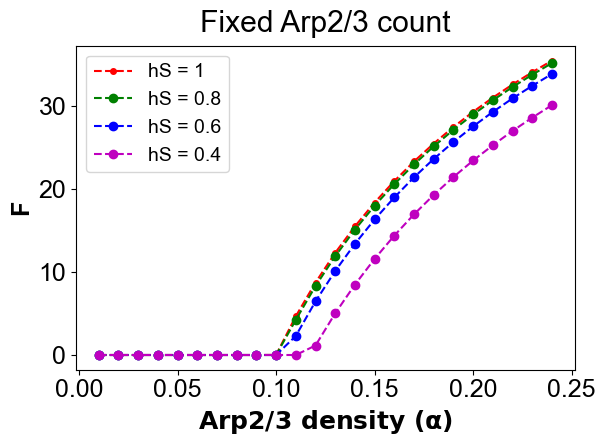

In [5]:
arpList = np.arange(0.01,0.25,0.01)
FA = getActinLevel(IC = [0.01, 100], params=(0.001,1,arpList,1))

fig, ax = plt.subplots()

ax.plot(arpList, FA, 'ro--', label = 'hS = 1', ms=4)

hS_list = [0.8, 0.6, 0.4]
colors = ['g', 'b', 'm']

for i, hS in enumerate(hS_list):
    arp_f = arpList*calc_oblate_factor(hS)
    FA = getActinLevel(IC = [0.01, 100], params=(0.001,1,arp_f,1))
    plt.plot(arpList, FA, f'{colors[i]}o--', label=f'hS = {hS}', ms=6)
    plt.legend(ncol=1, fontsize=14)

    
plt.xlabel(r'Arp2/3 density ($\alpha$)')
plt.ylabel('F', fontweight='bold')

plt.title('Fixed Arp2/3 count', pad=10)
plt.tight_layout()